In [2]:
'''
Приведите код из синхронного вида к ассинхронному
'''

import asyncio
import time
import requests as r


def fetch_url_data(url):
    '''
    Получение ответа от источника
    '''
    try:
        resp = r.get(url)
    except Exception as e:
        print(e)
    else:
        return  resp
    return


async def fetch_async(r):
    '''
    Отправка запросов к источнику
    '''
    url = "https://www.cian.ru/cat.php?deal_type=rent&engine_version=2&offer_type=flat&p={}&region=1&room1=1&room2=1&type=4"
    tasks = []
    '''
    Очень полезной оказался следующий пост на stackoverflow:
    https://stackoverflow.com/questions/22190403/how-could-i-use-requests-in-asyncio
    
    А так же вот это обучающее видео:
    https://www.youtube.com/watch?v=t5Bo1Je9EmE
    
    Реализация проста, создаем задачи и ждем пока они все выполняться при помощи await
    '''
    loop = asyncio.get_event_loop()
    for i in range(r):
        tmp = url
        task = loop.run_in_executor(None,fetch_url_data,tmp.format(i))
        tasks.append(task)

    responses = await asyncio.gather(*tasks)
    return responses


if __name__ == '__main__':
    '''
    Точка входа в программу
    '''
    for i in range(100):
        start_time = time.time()
        # Не забываем использовать asyncio.run для вызова асинхронной функции
        responses = await fetch_async(i)
        print(f'Получено {i} результатов запроса за {time.time() - start_time} секунд')

Получено 0 результатов запроса за 0.0 секунд
Получено 1 результатов запроса за 0.19787168502807617 секунд
Получено 2 результатов запроса за 0.22868084907531738 секунд
Получено 3 результатов запроса за 0.21412277221679688 секунд
Получено 4 результатов запроса за 0.21675896644592285 секунд
Получено 5 результатов запроса за 0.23683404922485352 секунд
Получено 6 результатов запроса за 0.3008842468261719 секунд
Получено 7 результатов запроса за 0.2763180732727051 секунд
Получено 8 результатов запроса за 0.2966463565826416 секунд
Получено 9 результатов запроса за 0.2962040901184082 секунд
Получено 10 результатов запроса за 0.28348803520202637 секунд
Получено 11 результатов запроса за 0.29718899726867676 секунд
Получено 12 результатов запроса за 0.32842159271240234 секунд
Получено 13 результатов запроса за 0.4199230670928955 секунд
Получено 14 результатов запроса за 0.4541926383972168 секунд
Получено 15 результатов запроса за 0.42933201789855957 секунд
Получено 16 результатов запроса за 0.559

# Сравнение скорости

In [3]:
def fetch_sync(r):
    '''
    Отправка запросов к источнику
    '''
    url = "https://www.cian.ru/cat.php?deal_type=rent&engine_version=2&offer_type=flat&p={}&region=1&room1=1&room2=1&type=4"
    tasks = []
    for i in range(r):
        tmp = url
        task = fetch_url_data(tmp.format(i))
        tasks.append(task)
    responses = tasks
    return responses

In [9]:
t_sync = []
t_async = []
n = 20
for i in range(n):
    start_time = time.time()
    responses = await fetch_async(i)
    t_async.append(time.time() - start_time)
    print(f'Получено {i} результатов запроса за {time.time() - start_time} секунд')
    
for i in range(n):
    start_time = time.time()
    responses = fetch_sync(i)
    t_sync.append(time.time() - start_time)
    print(f'Получено {i} результатов запроса за {time.time() - start_time} секунд')

Получено 0 результатов запроса за 0.0009999275207519531 секунд
Получено 1 результатов запроса за 0.19532465934753418 секунд
Получено 2 результатов запроса за 0.202239990234375 секунд
Получено 3 результатов запроса за 0.2482309341430664 секунд
Получено 4 результатов запроса за 0.25133800506591797 секунд
Получено 5 результатов запроса за 0.233642578125 секунд
Получено 6 результатов запроса за 0.22699189186096191 секунд
Получено 7 результатов запроса за 0.24001836776733398 секунд
Получено 8 результатов запроса за 0.2779347896575928 секунд
Получено 9 результатов запроса за 0.33175015449523926 секунд
Получено 10 результатов запроса за 0.4711594581604004 секунд
Получено 11 результатов запроса за 0.3192305564880371 секунд
Получено 12 результатов запроса за 0.4058053493499756 секунд
Получено 13 результатов запроса за 0.45049142837524414 секунд
Получено 14 результатов запроса за 0.44006872177124023 секунд
Получено 15 результатов запроса за 0.46726298332214355 секунд
Получено 16 результатов запр

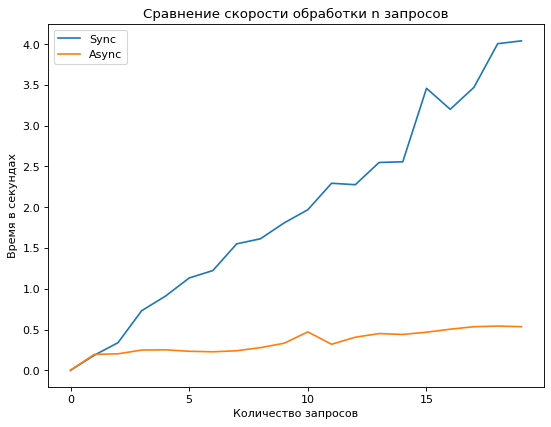

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=80)
 
plt.plot(range(n), t_sync, label = "Sync")
plt.plot(range(n), t_async, label = "Async")
plt.title("Сравнение скорости обработки n запросов")
plt.xlabel('Количество запросов') 
plt.ylabel('Время в секундах')
plt.xticks(range(0,n,5))
plt.legend()
plt.show()